In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import joblib

from data_preprocessing import pipeline
from feature_preprocessing import pipeline2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 데이터 전처리

In [6]:
# 로우 데이터 불러오기
file_path = "./storage/raw_data/병합_청약매물_목록_정보_픽스2.csv"
# df = pd.read_csv(file_path, encoding ='cp949')
df = pd.read_csv(file_path)

# 데이터 전처리````
preprocessing_pipeline = pipeline(type='train')
df = preprocessing_pipeline.transform(df)

#칼럼정리(시세차익 있)
df['시세차익'] = df['전용면적'] * df['전용면적당 시세차익']
df.drop(columns=['전용면적', '전용면적당 시세차익', '거래금액(만원)', '공급금액(최고가 기준)'], inplace=True)

# 파일 저장
file_version = "20일low트레인"
output_file = f"./storage/train_data/train-{file_version}.csv"
df.to_csv(output_file, index=False, encoding='cp949')

C:\Users\user\AppData\Local\Temp\ipykernel_13308\2078300287.py:4: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
c:\Users\user\mid_project\src\data_preprocessing.py:146: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_estate_price = pd.read_csv(csv_path, encoding="cp949")
c:\Users\user\mid_project\src\data_preprocessing.py:331: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['최저당첨가점'

In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2981 entries, 44 to 17246
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   공급지역코드        2981 non-null   int64  
 1   공급규모          2981 non-null   int64  
 2   투기과열지구        2981 non-null   object 
 3   조정대상지역        2981 non-null   object 
 4   분양가상한제        2981 non-null   object 
 5   정비사업          2981 non-null   object 
 6   공공주택지구        2981 non-null   object 
 7   대규모택지개발지구     2981 non-null   object 
 8   수도권내민영공공주택지구  2981 non-null   object 
 9   공급세대수         2981 non-null   int64  
 10  순위            2981 non-null   object 
 11  거주지역          2981 non-null   object 
 12  접수건수          2981 non-null   int64  
 13  경쟁률           2981 non-null   float64
 14  최저당첨가점        2981 non-null   float64
 15  토픽 1          2981 non-null   float64
 16  토픽 2          2981 non-null   float64
 17  토픽 3          2981 non-null   float64
 18  토픽 4          2981 non-null   f

### 모델 학습 및 평가

In [ ]:
# 전처리된 데이터 가져오기
df = pd.read_csv("./storage/train_data/train-2트_시세차익o.csv", encoding = 'cp949')

In [ ]:
X = df.drop(columns=["최저당첨가점"])
Y = df["최저당첨가점"]

X_train, X_test, y_train, y_test = train_test_split(
    X,  # 타겟(최저당첨가점) 제외
    Y,  # 타겟
    test_size=0.2,
    random_state=42,
    stratify=df["순위"]  
)


In [20]:
feature_pipeline = pipeline2()

# 학습 데이터(X_train)에 fit
feature_pipeline.fit(X_train)

# 학습 데이터(X_train)를 변환
X_train_transformed = feature_pipeline.transform(X_train)

# 테스트 데이터(X_test)를 변환
X_test_transformed = feature_pipeline.transform(X_test)

Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구',
       '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '법정동코드',
       '시세차익'],
      dtype='object')
Index(['공급지역코드', '공급규모', '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역',
       '접수건수', '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7',
       '법정동코드', '시세차익', '투기과열지구_N', '투기과열지구_Y', '조정대상지역_N', '조정대상지역_Y',
       '분양가상한제_N', '분양가상한제_Y', '정비사업_N', '정비사업_Y', '공공주택지구_N', '공공주택지구_Y'],
      dtype='object')
⚠️ Warning: 새로운 법정동코드 발견 {'1121510400.0', '4183033022.0', '2817710200.0', '4183031023.0', '4115010900.0'}. 'unknown'으로 대체합니다.
Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구',
       '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '법정동코드',
       '시세차익'],
      dtype='object')
Index(['공급지역코드', '공급규모', '대규모택지개발지구

c:\Users\user\anaconda3\envs\project-env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\user\anaconda3\envs\project-env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


### RandomForeset Regressor

In [13]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 전처리된 데이터 가져오기
df = pd.read_csv("./storage/train_data/train-20일low트레인.csv", encoding = 'cp949')

X = df.drop(columns=["최저당첨가점"])
Y = df["최저당첨가점"]

X_train, X_test, y_train, y_test = train_test_split(
    X,  # 타겟(최저당첨가점) 제외
    Y,  # 타겟
    test_size=0.2,
    random_state=42
)

feature_pipeline = pipeline2()

# 학습 데이터(X_train)에 fit
feature_pipeline.fit(X_train)

# 학습 데이터(X_train)를 변환
X_train_transformed = feature_pipeline.transform(X_train)

# 테스트 데이터(X_test)를 변환
X_test_transformed = feature_pipeline.transform(X_test)



Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구',
       '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '법정동코드',
       '시세차익'],
      dtype='object')
Index(['공급규모', '공급세대수', '접수건수', '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5',
       '토픽 6', '토픽 7', '법정동코드', '시세차익', '투기과열지구_N', '투기과열지구_Y', '조정대상지역_N',
       '조정대상지역_Y', '분양가상한제_N', '분양가상한제_Y', '정비사업_N', '정비사업_Y', '공공주택지구_N',
       '공공주택지구_Y', '대규모택지개발지구_N', '대규모택지개발지구_Y', '거주지역_기타지역', '거주지역_해당지역',
       '공급지역코드_100', '공급지역코드_400', '공급지역코드_410', '수도권내민영공공주택지구_N',
       '수도권내민영공공주택지구_Y', '순위_1순위'],
      dtype='object')
⚠️ Warning: 새로운 법정동코드 발견 {'4150032026.0', '2871031025.0', '4146510300.0'}. 'unknown'으로 대체합니다.
Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구',
       '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '법정동코드',


c:\Users\user\anaconda3\envs\project-env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\user\anaconda3\envs\project-env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 랜덤 포레스트 회귀 모델 생성
rf_model = RandomForestRegressor()

# 하이퍼파라미터 범위 설정
rf_param_grid = {
    'n_estimators': np.arange(800, 1100, 100), 
    'max_depth': np.arange(10, 60, 10), 
    'max_features': np.arange(6, 17, 2),  
    'min_samples_leaf': np.arange(8, 19, 2),  
    'min_samples_split': np.arange(8, 21, 2) 
}

# 랜덤 서치 설정
rf_random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions=rf_param_grid, 
    cv=5, 
    n_iter=50
)

# 모델 학습
rf_random_search.fit(X_train_transformed, y_train)

# 베스트 파라미터 출력
print("베스트 파라미터:")
print(rf_random_search.best_params_)

# 테스트 데이터에서 예측 수행
y_pred = rf_random_search.best_estimator_.predict(X_test_transformed)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R² 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f"랜덤 포레스트 - RMSE: {rmse:.4f}, R²: {r2:.4f}")


베스트 파라미터:
{'n_estimators': np.int64(1000), 'min_samples_split': np.int64(14), 'min_samples_leaf': np.int64(14), 'max_features': np.int64(16), 'max_depth': np.int64(20)}
랜덤 포레스트 - RMSE: 6.4006, R²: 0.7982


Random Forest - RMSE: 6.178582808858944, R^2: 0.8119418730991822


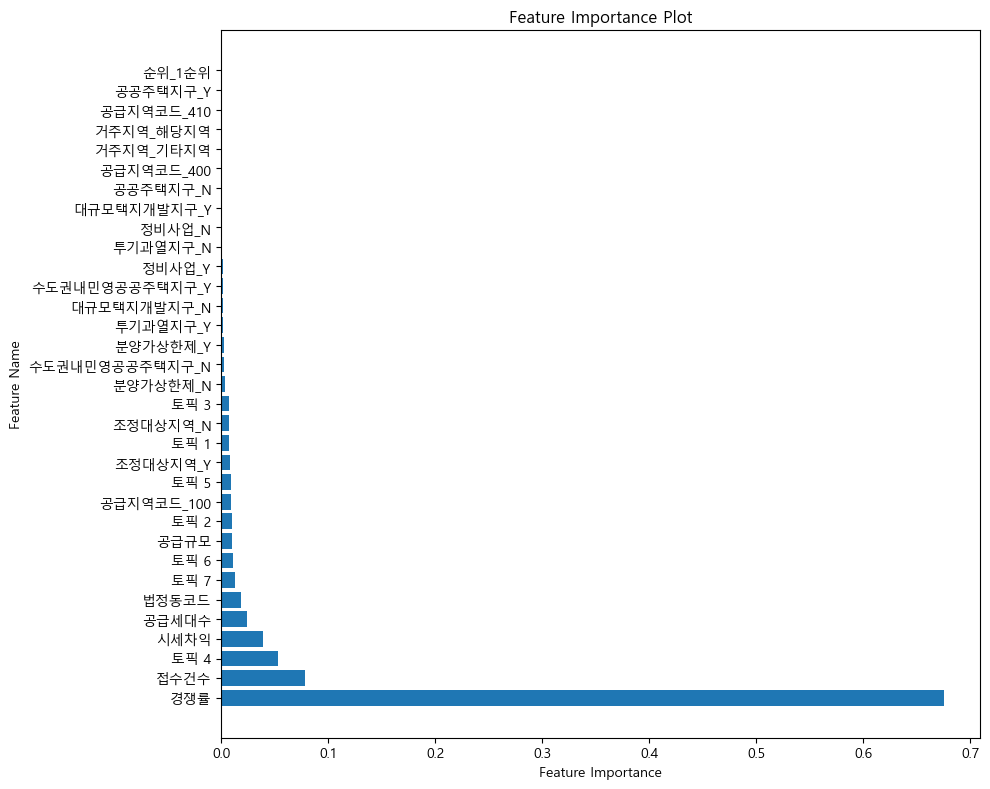

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 랜덤 포레스트 회귀 모델 생성 및 학습
rf_model = RandomForestRegressor(
    max_depth=40, 
    max_features=14, 
    min_samples_leaf=8,
    min_samples_split=14, 
    n_estimators=100
)

rf_model.fit(X_train_transformed, y_train)

y_pred_rf = rf_model.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf}, R^2: {r2_rf}")

# Feature Importance 평균 계산 및 출력
# 랜덤 포레스트 모델의 feature_importances_ 속성을 사용
feature_importances = rf_model.feature_importances_

# Feature Importance 시각화
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))  # 그래프 크기 설정
plt.barh(X_train_transformed.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Plot")
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [11]:
X_train_transformed.drop(['순위_1순위', '공공주택지구_Y', '공급지역코드_410', '거주지역_해당지역', '거주지역_기타지역', '공급지역코드_400', '공공주택지구_N', '대규모택지개발지구_Y', '정비사업_N', '투기과열지구_N'], axis=1, inplace=True)
X_test_transformed.drop(['순위_1순위', '공공주택지구_Y', '공급지역코드_410', '거주지역_해당지역', '거주지역_기타지역', '공급지역코드_400', '공공주택지구_N', '대규모택지개발지구_Y', '정비사업_N', '투기과열지구_N'], axis=1, inplace=True)


Random Forest - RMSE: 6.239609596874887, R^2: 0.8082085699230844


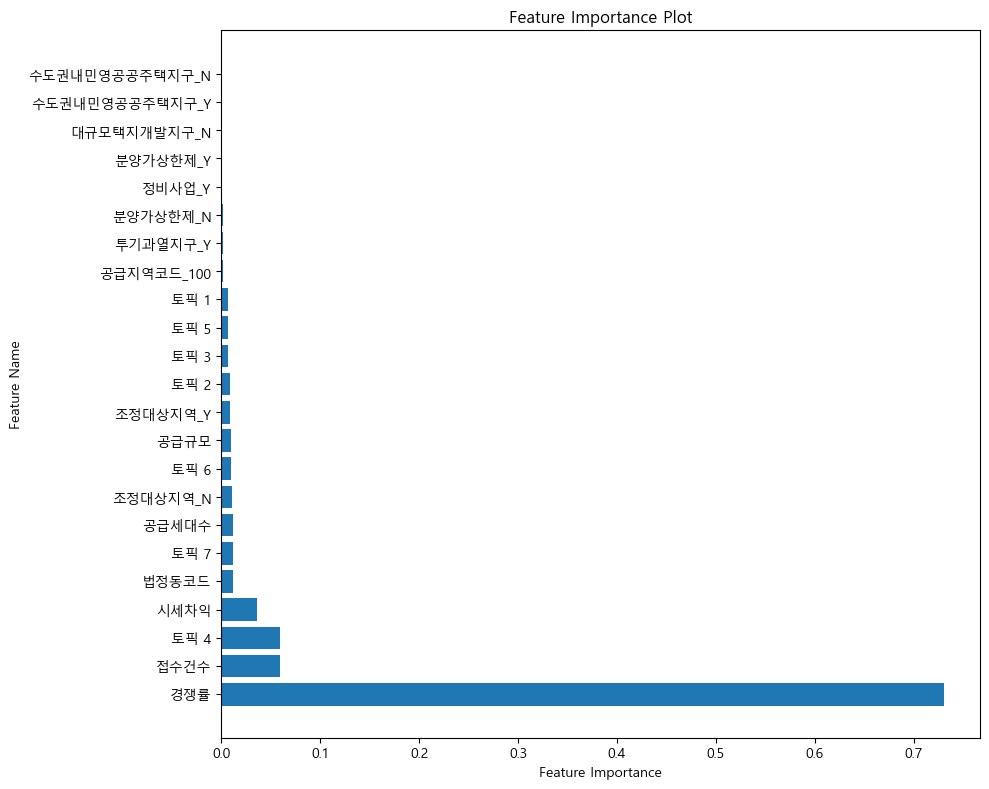

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 랜덤 포레스트 회귀 모델 생성 및 학습
rf_model = RandomForestRegressor(
    max_depth=40, 
    max_features=14, 
    min_samples_leaf=8,
    min_samples_split=14, 
    n_estimators=100
)

rf_model.fit(X_train_transformed, y_train)

y_pred_rf = rf_model.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf}, R^2: {r2_rf}")

# Feature Importance 평균 계산 및 출력
# 랜덤 포레스트 모델의 feature_importances_ 속성을 사용
feature_importances = rf_model.feature_importances_

# Feature Importance 시각화
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))  # 그래프 크기 설정
plt.barh(X_train_transformed.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Plot")
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [14]:
X_train_transformed.drop(['순위_1순위', '공공주택지구_Y', '공급지역코드_410', '거주지역_해당지역', '거주지역_기타지역', '공급지역코드_400', '공공주택지구_N', '대규모택지개발지구_Y', '정비사업_N', '투기과열지구_N', '수도권내민영공공주택지구_N', '수도권내민영공공주택지구_Y', '대규모택지개발지구_N', '분양가상한제_Y', '정비사업_Y', '분양가상한제_N', '투기과열지구_Y', '공급지역코드_100' ], axis=1, inplace=True)
X_test_transformed.drop(['순위_1순위', '공공주택지구_Y', '공급지역코드_410', '거주지역_해당지역', '거주지역_기타지역', '공급지역코드_400', '공공주택지구_N', '대규모택지개발지구_Y', '정비사업_N', '투기과열지구_N', '수도권내민영공공주택지구_N', '수도권내민영공공주택지구_Y', '대규모택지개발지구_N', '분양가상한제_Y', '정비사업_Y', '분양가상한제_N', '투기과열지구_Y', '공급지역코드_100' ], axis=1, inplace=True)


Random Forest - RMSE: 6.166716628991305, R^2: 0.8126635236012328


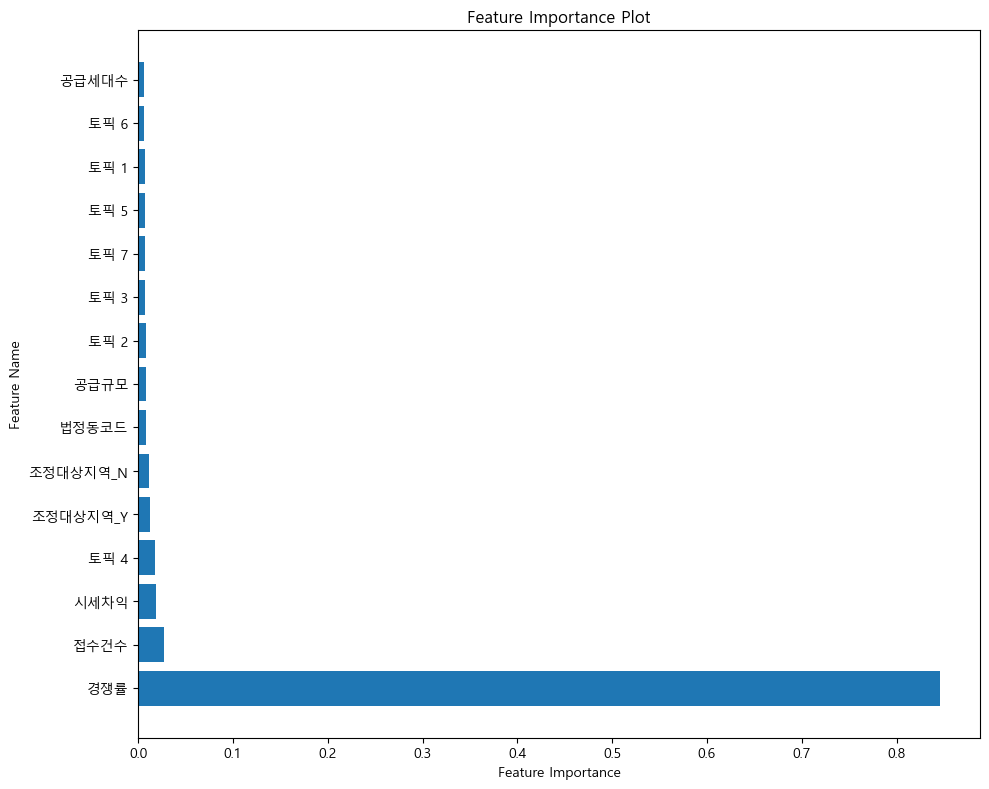

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 랜덤 포레스트 회귀 모델 생성 및 학습
rf_model = RandomForestRegressor(
    max_depth=40, 
    max_features=14, 
    min_samples_leaf=8,
    min_samples_split=14, 
    n_estimators=100
)

rf_model.fit(X_train_transformed, y_train)

y_pred_rf = rf_model.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf}, R^2: {r2_rf}")

# Feature Importance 평균 계산 및 출력
# 랜덤 포레스트 모델의 feature_importances_ 속성을 사용
feature_importances = rf_model.feature_importances_

# Feature Importance 시각화
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))  # 그래프 크기 설정
plt.barh(X_train_transformed.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Plot")
plt.tight_layout()  # 레이아웃 조정
plt.show()

### XGBoost

In [17]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 전처리된 데이터 가져오기
df = pd.read_csv("./storage/train_data/train-20일low트레인.csv", encoding = 'cp949')

X = df.drop(columns=["최저당첨가점"])
Y = df["최저당첨가점"]

X_train, X_test, y_train, y_test = train_test_split(
    X,  # 타겟(최저당첨가점) 제외
    Y,  # 타겟
    test_size=0.2,
    random_state=42
)

feature_pipeline = pipeline2()

# 학습 데이터(X_train)에 fit
feature_pipeline.fit(X_train)

# 학습 데이터(X_train)를 변환
X_train_transformed = feature_pipeline.transform(X_train)

# 테스트 데이터(X_test)를 변환
X_test_transformed = feature_pipeline.transform(X_test)



Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구',
       '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '법정동코드',
       '시세차익'],
      dtype='object')
Index(['공급규모', '공급세대수', '접수건수', '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5',
       '토픽 6', '토픽 7', '법정동코드', '시세차익', '투기과열지구_N', '투기과열지구_Y', '조정대상지역_N',
       '조정대상지역_Y', '분양가상한제_N', '분양가상한제_Y', '정비사업_N', '정비사업_Y', '공공주택지구_N',
       '공공주택지구_Y', '대규모택지개발지구_N', '대규모택지개발지구_Y', '거주지역_기타지역', '거주지역_해당지역',
       '공급지역코드_100', '공급지역코드_400', '공급지역코드_410', '수도권내민영공공주택지구_N',
       '수도권내민영공공주택지구_Y', '순위_1순위'],
      dtype='object')
⚠️ Warning: 새로운 법정동코드 발견 {'4146510300.0', '4150032026.0', '2871031025.0'}. 'unknown'으로 대체합니다.
Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구',
       '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '법정동코드',


c:\Users\user\anaconda3\envs\project-env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\user\anaconda3\envs\project-env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [5]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Grid Search 파라미터 설정
xgb_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Grid Search 수행
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_xgb = xgb_grid_search.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb}, R^2: {r2_xgb}")

# 최적의 파라미터 출력
print("Best parameters:")
for param, value in xgb_grid_search.best_params_.items():
    print(f"{param}: {value}")

    

XGBoost - RMSE: 5.84831285883416, R^2: 0.8315094462906885
Best parameters:
colsample_bytree: 0.9
learning_rate: 0.1
max_depth: 3
n_estimators: 500
subsample: 0.9


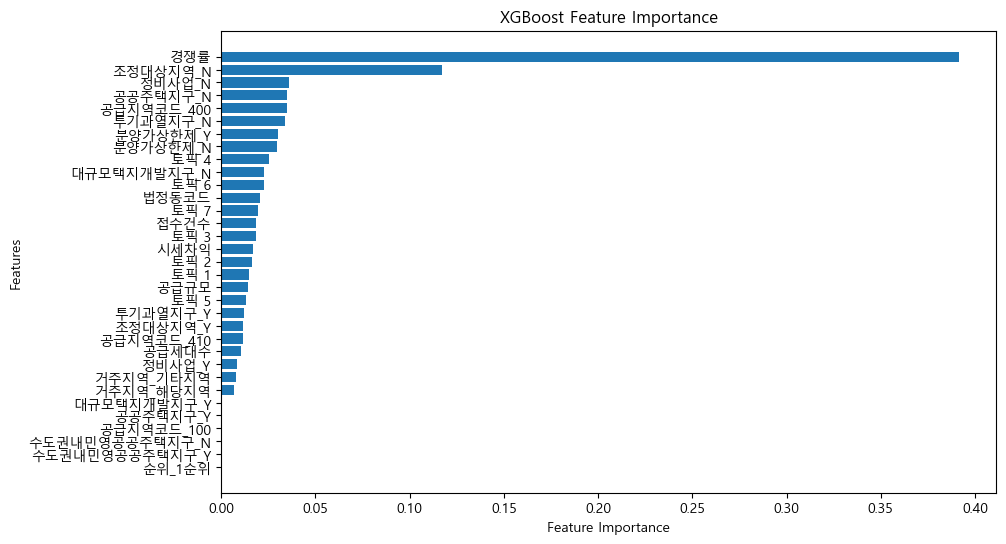

Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.9}


In [6]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
# 중요 변수 추출 (수정됨)
feature_importance = xgb_grid_search.best_estimator_.feature_importances_
# 변수명과 중요도를 데이터프레임으로 저장 (수정됨)
feature_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
# 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()

# 베스트 파라미터 출력
print("Best Parameters:", xgb_grid_search.best_params_)

In [18]:
X_train_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_Y', '수도권내민영공공주택지구_N', '공급지역코드_100', '공공주택지구_Y', '대규모택지개발지구_Y'], axis=1, inplace=True)
X_test_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_Y', '수도권내민영공공주택지구_N', '공급지역코드_100', '공공주택지구_Y', '대규모택지개발지구_Y'], axis=1, inplace=True)


In [19]:
# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.9)
xgb_model.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_xgb = xgb_model.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb}, R^2: {r2_xgb}")

XGBoost - RMSE: 5.735819965144448, R^2: 0.8379289725490775


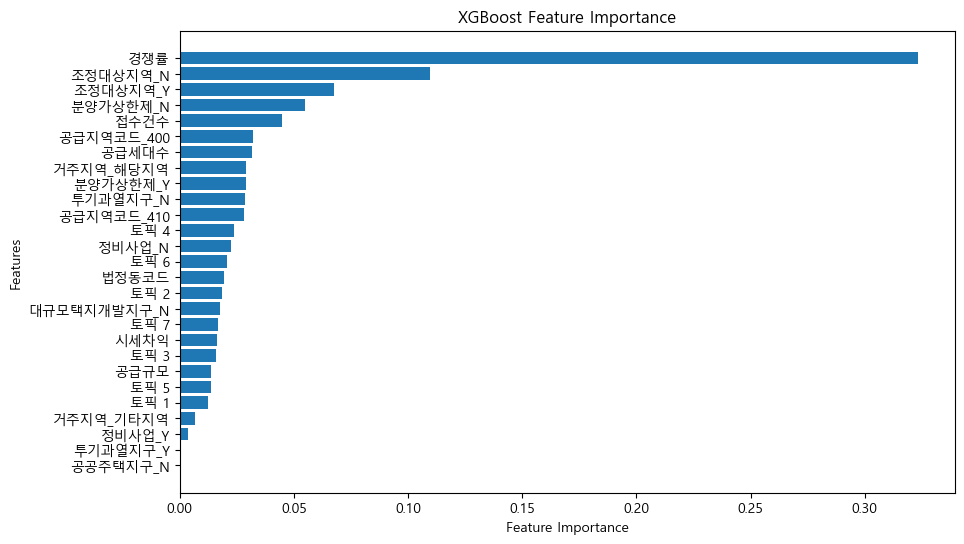

In [11]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
# 중요 변수 추출 (수정됨)
feature_importance = xgb_model.feature_importances_
# 변수명과 중요도를 데이터프레임으로 저장 (수정됨)
feature_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
# 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()


In [14]:
X_train_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_Y', '수도권내민영공공주택지구_N', '공급지역코드_100', '공공주택지구_Y', '대규모택지개발지구_Y', '공공주택지구_N', '투기과열지구_Y', '정비사업_Y', '거주지역_기타지역'], axis=1, inplace=True)
X_test_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_Y', '수도권내민영공공주택지구_N', '공급지역코드_100', '공공주택지구_Y', '대규모택지개발지구_Y', '공공주택지구_N', '투기과열지구_Y', '정비사업_Y', '거주지역_기타지역'], axis=1, inplace=True)


In [15]:
# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.9)
xgb_model.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_xgb = xgb_model.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb}, R^2: {r2_xgb}")

XGBoost - RMSE: 5.844078363284254, R^2: 0.8317533505484512


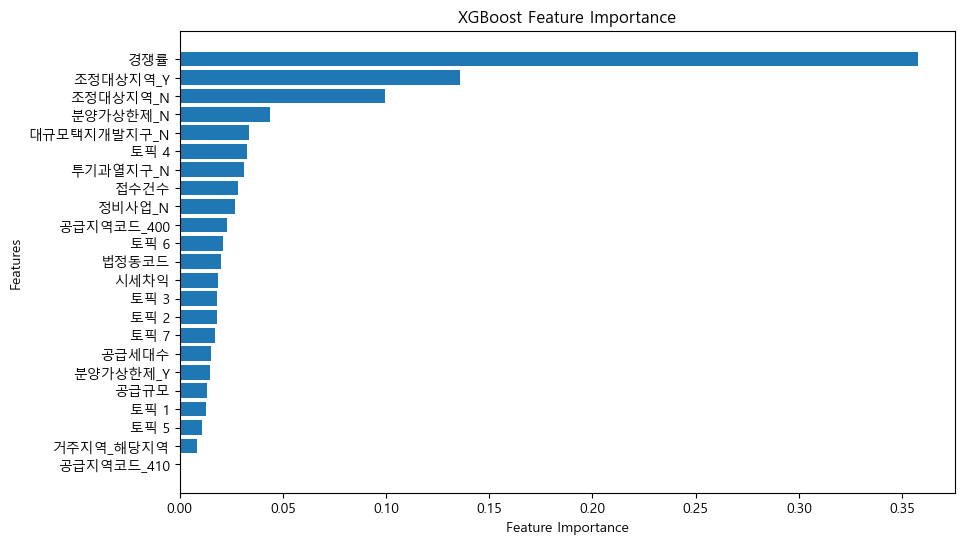

In [16]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
# 중요 변수 추출 (수정됨)
feature_importance = xgb_model.feature_importances_
# 변수명과 중요도를 데이터프레임으로 저장 (수정됨)
feature_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
# 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()


### LightGBM

In [4]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 전처리된 데이터 가져오기
df = pd.read_csv("./storage/train_data/train-20일low트레인.csv", encoding = 'cp949')

X = df.drop(columns=["최저당첨가점"])
Y = df["최저당첨가점"]

X_train, X_test, y_train, y_test = train_test_split(
    X,  # 타겟(최저당첨가점) 제외
    Y,  # 타겟
    test_size=0.2,
    random_state=42
)

feature_pipeline = pipeline2()

# 학습 데이터(X_train)에 fit
feature_pipeline.fit(X_train)

# 학습 데이터(X_train)를 변환
X_train_transformed = feature_pipeline.transform(X_train)

# 테스트 데이터(X_test)를 변환
X_test_transformed = feature_pipeline.transform(X_test)



Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구',
       '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '법정동코드',
       '시세차익'],
      dtype='object')
Index(['공급규모', '공급세대수', '접수건수', '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5',
       '토픽 6', '토픽 7', '법정동코드', '시세차익', '투기과열지구_N', '투기과열지구_Y', '조정대상지역_N',
       '조정대상지역_Y', '분양가상한제_N', '분양가상한제_Y', '정비사업_N', '정비사업_Y', '공공주택지구_N',
       '공공주택지구_Y', '대규모택지개발지구_N', '대규모택지개발지구_Y', '거주지역_기타지역', '거주지역_해당지역',
       '공급지역코드_100', '공급지역코드_400', '공급지역코드_410', '수도권내민영공공주택지구_N',
       '수도권내민영공공주택지구_Y', '순위_1순위'],
      dtype='object')
⚠️ Warning: 새로운 법정동코드 발견 {'4146510300.0', '4150032026.0', '2871031025.0'}. 'unknown'으로 대체합니다.
Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구',
       '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '법정동코드',


c:\Users\user\anaconda3\envs\project-env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\user\anaconda3\envs\project-env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [8]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# LightGBM 모델 생성
lgb_model = lgb.LGBMRegressor(verbose=-1)

# Grid Search 파라미터 설정
lgb_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'num_leaves': [15, 31],
}


# Grid Search 수행
lgb_grid_search = GridSearchCV(lgb_model, lgb_param_grid, cv=5)
lgb_grid_search.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_lgb = lgb_grid_search.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_lgb, r2_lgb = evaluate_model(y_test, y_pred_lgb)
print(f"LightGBM - RMSE: {rmse_lgb}, R^2: {r2_lgb}")


LightGBM - RMSE: 5.735211091905167, R^2: 0.8379633793032858


In [9]:
# 최적의 파라미터 출력
print("Best parameters:")
for param, value in lgb_grid_search.best_params_.items():
    print(f"{param}: {value}")


Best parameters:
colsample_bytree: 0.8
learning_rate: 0.01
max_depth: 7
n_estimators: 1000
num_leaves: 15
subsample: 0.8


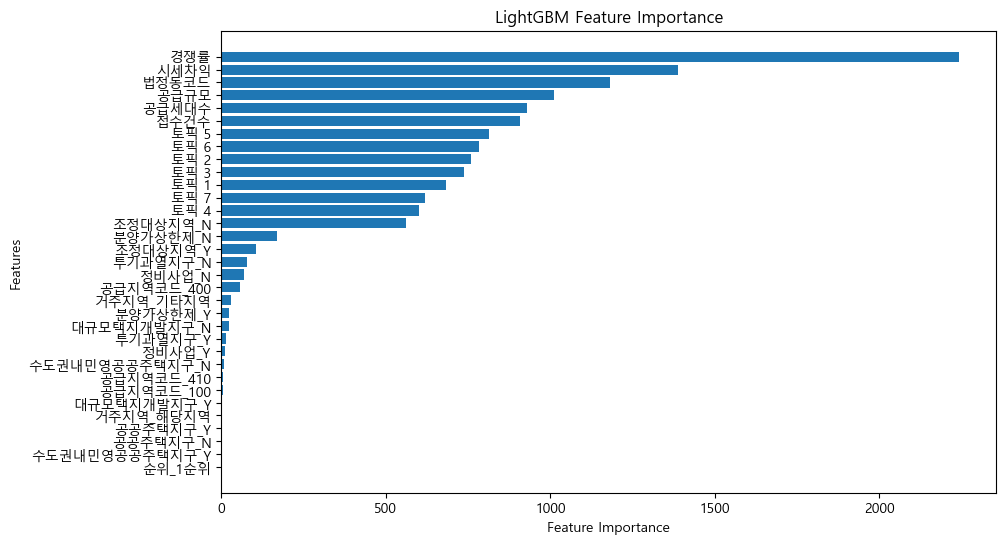

In [12]:
# Feature Importance 시각화
feature_importance = lgb_grid_search.best_estimator_.feature_importances_

feature_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.show()

In [30]:
X_train_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_Y', '공공주택지구_N', '공공주택지구_Y', '거주지역_해당지역', '대규모택지개발지구_Y'], axis=1, inplace=True)
X_test_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_Y', '공공주택지구_N', '공공주택지구_Y', '거주지역_해당지역', '대규모택지개발지구_Y'], axis=1, inplace=True)


In [31]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# LightGBM 모델 생성
lgb_model = lgb.LGBMRegressor(verbose=-1, colsample_bytree= 0.8, 
                              learning_rate=0.01,max_depth=7, n_estimators=1000,num_leaves=15, subsample=0.8)
lgb_model.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_lgb = lgb_model.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_lgb, r2_lgb = evaluate_model(y_test, y_pred_lgb)
print(f"LightGBM - RMSE: {rmse_lgb}, R^2: {r2_lgb}")

LightGBM - RMSE: 5.6682603792069015, R^2: 0.8417244080041401


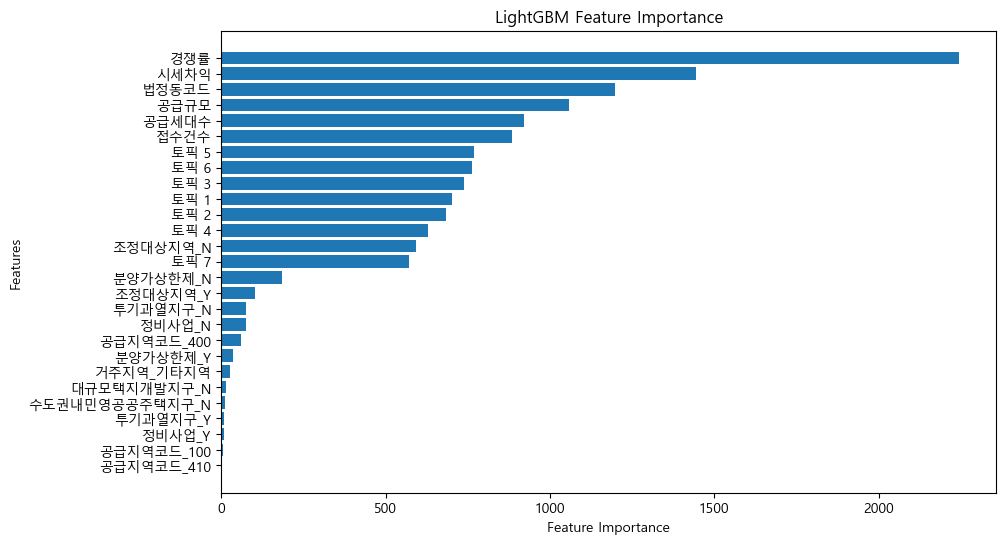

In [32]:
# Feature Importance 시각화
feature_importance = lgb_model.feature_importances_

feature_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.show()

In [26]:
X_train_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_Y', '공공주택지구_N', '공공주택지구_Y', '거주지역_해당지역', '대규모택지개발지구_Y', '공급지역코드_410', '공급지역코드_100', '정비사업_Y', '투기과열지구_Y', '수도권내민영공공주택지구_N', '대규모택지개발지구_N', '거주지역_기타지역', '분양가상한제_Y'], axis=1, inplace=True)
X_test_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_Y', '공공주택지구_N', '공공주택지구_Y', '거주지역_해당지역', '대규모택지개발지구_Y', '공급지역코드_410', '공급지역코드_100', '정비사업_Y', '투기과열지구_Y', '수도권내민영공공주택지구_N', '대규모택지개발지구_N', '거주지역_기타지역', '분양가상한제_Y'], axis=1, inplace=True)


In [27]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# LightGBM 모델 생성
lgb_model = lgb.LGBMRegressor(verbose=-1, colsample_bytree= 0.8, 
                              learning_rate=0.01,max_depth=7, n_estimators=1000,num_leaves=15, subsample=0.8)
lgb_model.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_lgb = lgb_model.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_lgb, r2_lgb = evaluate_model(y_test, y_pred_lgb)
print(f"LightGBM - RMSE: {rmse_lgb}, R^2: {r2_lgb}")

LightGBM - RMSE: 5.714847590682447, R^2: 0.8391119944161751


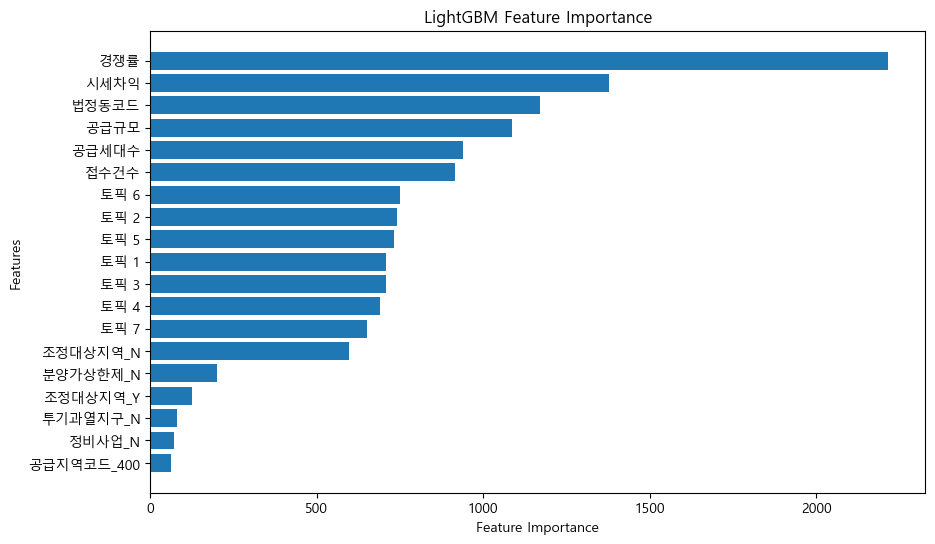

In [28]:
# Feature Importance 시각화
feature_importance = lgb_model.feature_importances_

feature_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.show()

### 이 아래로는 kfolod 써서 처음에 시도한 코드

각 Fold의 RMSE: [5.87759509570153, 5.347221363500163, 6.047203487643223, 5.517817414039273, 5.25831935878676]
평균 RMSE: 5.609631343934189
Feature Importance (평균):
공급규모: 0.0087
공급세대수: 0.0131
접수건수: 0.0098
경쟁률: 0.7987
토픽 1: 0.0073
토픽 2: 0.0077
토픽 3: 0.0070
토픽 4: 0.0110
토픽 5: 0.0086
토픽 6: 0.0085
토픽 7: 0.0076
전용면적: 0.0123
공급금액(최고가 기준): 0.0205
법정동코드: 0.0075
거래금액(만원): 0.0188
전용면적당 시세차익: 0.0152
투기과열지구_N: 0.0006
투기과열지구_Y: 0.0006
조정대상지역_N: 0.0146
조정대상지역_Y: 0.0140
분양가상한제_N: 0.0004
분양가상한제_Y: 0.0005
정비사업_N: 0.0009
정비사업_Y: 0.0009
공공주택지구_N: 0.0004
공공주택지구_Y: 0.0004
대규모택지개발지구_N: 0.0004
대규모택지개발지구_Y: 0.0004
수도권내민영공공주택지구_N: 0.0001
수도권내민영공공주택지구_Y: 0.0002
순위_1순위: 0.0000
거주지역_기타지역: 0.0003
거주지역_해당지역: 0.0003
공급지역코드_100: 0.0003
공급지역코드_400: 0.0018
공급지역코드_410: 0.0004


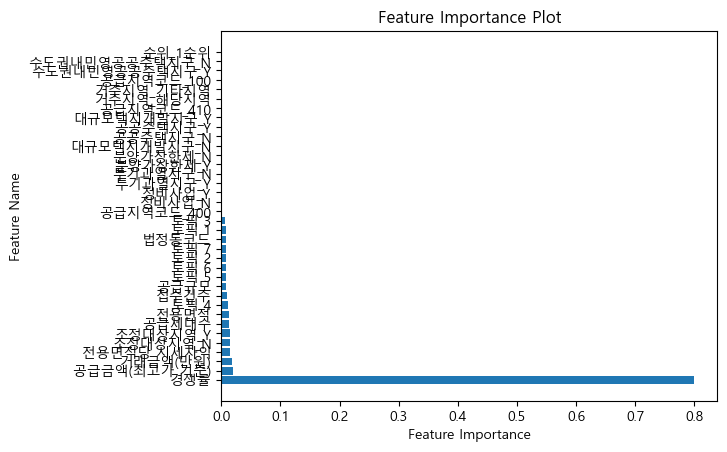

In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
# import numpy as np

# # 1. 랜덤포레스트 모델 고정
# model = RandomForestRegressor(
#     n_estimators=100,
#     max_depth=None,
#     random_state=42
# )

# # 2. K-Fold 교차 검증 설정 (5개 폴드로 나누기)
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# #  3. MAE, RMSE 저장할 리스트
# mae_scores = []
# rmse_scores = []
# feature_importances = []

# # 4. K-Fold 반복문 (5번 반복)
# for train_index, test_index in kf.split(X_train_transformed):
#     X_tr, X_val = X_train_transformed.iloc[train_index], X_train_transformed.iloc[test_index]
#     y_tr, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

#     # 5. 모델 훈련
#     model.fit(X_tr, y_tr)
    
#     # 6. 예측값 뽑기
#     y_pred = model.predict(X_val)
    
#     # 7. MAE & RMSE 계산
#     mae = mean_absolute_error(y_val, y_pred)
#     rmse = root_mean_squared_error(y_val, y_pred)
    
#     # 8. 결과 저장
#     mae_scores.append(mae)
#     rmse_scores.append(rmse)
    
#     # 9. Feature Importance 저장
#     feature_importances.append(model.feature_importances_)

# #  10. 결과 출력
# print(f"각 Fold의 RMSE: {rmse_scores}")
# print(f"평균 RMSE: {np.mean(rmse_scores)}")


# # Feature Importance 평균 계산 및 출력
# avg_feature_importances = np.mean(feature_importances, axis=0)
# print("Feature Importance (평균):")
# for i, col in enumerate(X_train_transformed.columns):
#     print(f"{col}: {avg_feature_importances[i]:.4f}")

# # Feature Importance 시각화
# import matplotlib.pyplot as plt

# sorted_idx = np.argsort(avg_feature_importances)[::-1]
# plt.barh(X_train_transformed.columns[sorted_idx], avg_feature_importances[sorted_idx])
# plt.xlabel("Feature Importance")
# plt.ylabel("Feature Name")
# plt.title("Feature Importance Plot")
# plt.show()


### 모델 저장 

In [16]:
# 모델 저장 및 로드

version = 'rf_lowest_0.0.2'

# 모델 저장
joblib.dump(rf_model, f"./storage/trained_model/model_{version}.pkl")

['./storage/trained_model/model_rf_lowest_0.0.2.pkl']

In [8]:
# 모델 로드
loaded_model = joblib.load("./storage/trained_model/model_0.0.1.pkl")

# 예측
# X_test = np.array([[1, 2]])
# prediction = loaded_model.predict(X_test)
# print("Prediction:", prediction)